In [1]:
import os
import cv2, matplotlib
from glob import glob
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import keras
from keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
%matplotlib inline

Using Theano backend.
Using gpu device 0: Graphics Device (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 5110)
/home/bfortuner/anaconda3/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
DATA_PATH='/media/bfortuner/bigguy/data/'
IMAGES_PATH=DATA_PATH+'animecolor/'
EDGES_PATH=DATA_PATH+'anime_bw/edges/train/'
RESULTS_PATH=DATA_PATH+'results/'

## View Images

In [3]:
def get_paths_to_files(dir_path):
    filepaths = []
    fnames = []
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        filepaths.extend(os.path.join(dirpath, f) for f in filenames)
        fnames.extend([f for f in filenames])
    return filepaths, fnames

def get_random_image_path(dir_path):
    filepaths = get_paths_to_files(dir_path)[0]
    return filepaths[random.randrange(len(filepaths))]

print (get_random_image_path(IMAGES_PATH))

/media/bfortuner/bigguy/data/animecolor/32107.jpg


In [4]:
fpaths, fnames = get_paths_to_files(IMAGES_PATH)

In [5]:
print(len(fpaths))

38812


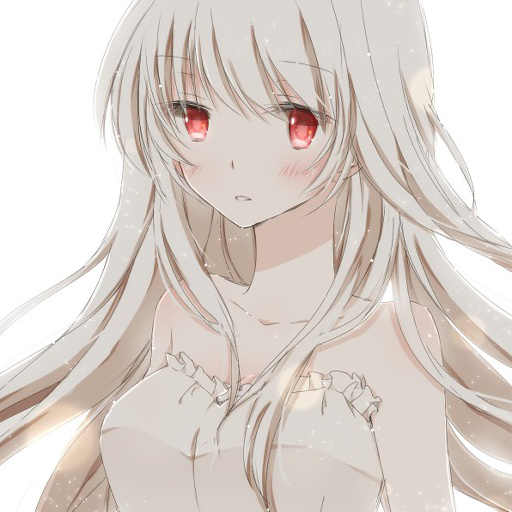

In [6]:
# View image with PIL
img_path = get_random_image_path(IMAGES_PATH)
img = Image.open(img_path)
img

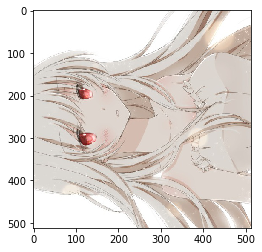

In [7]:
def get_img_arr(img_path):
    img = load_img(img_path)
    img_arr = keras.preprocessing.image.img_to_array(img)
    if img_arr.shape[-1] != 3:
        img_arr = np.swapaxes(img_arr,0,-1)    
    return img_arr

# Plot numpy array image
def plot_img_array(img_arr):
    plt.imshow(img_arr.astype('uint8'))
    plt.show()

img_arr = get_img_arr(img_path)
plot_img_array(img_arr)

## Process Images

In [8]:
img = cv2.imread(img_path,0)
type(img)

numpy.ndarray

In [9]:
pic = cv2.imread(img_path)

In [10]:
def get_image(image_path):
    return transform(imread(image_path))

def transform(image, npx=512, is_crop=True):
    cropped_image = cv2.resize(image, (256,256))

    return np.array(cropped_image)

def imread(path):
    readimage = cv2.imread(path, 1)
    return readimage

## Canny Edge Detector

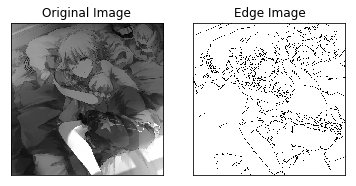

In [11]:
img_path = get_random_image_path(IMAGES_PATH)
img = cv2.imread(img_path,0)
edges = cv2.Canny(img,100,200)
edges = np.invert(edges)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Clean Edge Extraction

* http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

In [12]:
def extract_edge(imname, blur=False, median=False, bilateral=False):
    #cimg = cv2.imread(imname,1)
    #cimg = np.fliplr(cimg.reshape(-1,3)).reshape(cimg.shape)
    #cimg = cv2.resize(cimg, (256,256))

    img = cv2.imread(imname,0)
    if img is None:
        return None
    
    if img.shape[-1] != 3:
        img = np.swapaxes(img,0,-1)        
    
    if blur:
        img = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
    if median:
        img = cv2.medianBlur(img,5)
    if bilateral:
        img = cv2.bilateralFilter(img,9,75,75)

    # img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_edge = cv2.adaptiveThreshold(img, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY,
                                     blockSize=9,
                                     C=2)
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    
    return img_edge

def extract_all(dir_path):
    fpaths,fnames = get_paths_to_files(dir_path)
    for i in tqdm(range(len(fpaths))):
        edge = extract_edge(fpaths[i], median=True, blur=True)    
        if edge is not None:
            cv2.imwrite(EDGES_PATH+fnames[i]+"_edge.png", edge)
        else:
            print(fpaths[i] + " is None")

In [13]:
extract_all(IMAGES_PATH)

  3%|▎         | 1294/38812 [00:07<03:24, 183.80it/s]

/media/bfortuner/bigguy/data/animecolor/38773.jpg is None


  4%|▍         | 1619/38812 [00:08<03:18, 187.60it/s]

/media/bfortuner/bigguy/data/animecolor/38791.jpg is None


  7%|▋         | 2567/38812 [00:14<03:17, 183.56it/s]

/media/bfortuner/bigguy/data/animecolor/38802.jpg is None


  8%|▊         | 3215/38812 [00:17<03:10, 186.89it/s]

/media/bfortuner/bigguy/data/animecolor/38761.jpg is None
/media/bfortuner/bigguy/data/animecolor/38770.jpg is None


 10%|▉         | 3768/38812 [00:20<03:12, 181.95it/s]

/media/bfortuner/bigguy/data/animecolor/38772.jpg is None


 14%|█▍        | 5480/38812 [00:29<03:03, 181.94it/s]

/media/bfortuner/bigguy/data/animecolor/38769.jpg is None


 15%|█▌        | 6013/38812 [00:32<02:57, 184.48it/s]

/media/bfortuner/bigguy/data/animecolor/38752.jpg is None


 16%|█▌        | 6147/38812 [00:33<02:56, 185.36it/s]

/media/bfortuner/bigguy/data/animecolor/38756.jpg is None


 16%|█▌        | 6243/38812 [00:34<02:55, 185.72it/s]

/media/bfortuner/bigguy/data/animecolor/38785.jpg is None


 17%|█▋        | 6626/38812 [00:36<02:52, 186.13it/s]

/media/bfortuner/bigguy/data/animecolor/38760.jpg is None


 18%|█▊        | 6875/38812 [00:37<02:53, 183.58it/s]

/media/bfortuner/bigguy/data/animecolor/38783.jpg is None


 19%|█▉        | 7519/38812 [00:41<02:49, 184.36it/s]

/media/bfortuner/bigguy/data/animecolor/38811.jpg is None


 20%|█▉        | 7614/38812 [00:41<02:51, 181.74it/s]

/media/bfortuner/bigguy/data/animecolor/38754.jpg is None


 20%|██        | 7900/38812 [00:43<02:47, 184.06it/s]

/media/bfortuner/bigguy/data/animecolor/38797.jpg is None


 22%|██▏       | 8546/38812 [00:46<02:43, 185.00it/s]

/media/bfortuner/bigguy/data/animecolor/38806.jpg is None


 23%|██▎       | 9022/38812 [00:49<02:42, 183.12it/s]

/media/bfortuner/bigguy/data/animecolor/38780.jpg is None


 24%|██▍       | 9289/38812 [00:50<02:39, 185.35it/s]

/media/bfortuner/bigguy/data/animecolor/38764.jpg is None


 28%|██▊       | 10867/38812 [00:59<02:34, 180.68it/s]

/media/bfortuner/bigguy/data/animecolor/38762.jpg is None


 29%|██▊       | 11153/38812 [01:01<02:27, 188.13it/s]

/media/bfortuner/bigguy/data/animecolor/38771.jpg is None


 31%|███▏      | 12179/38812 [01:06<02:25, 182.76it/s]

/media/bfortuner/bigguy/data/animecolor/38800.jpg is None


 33%|███▎      | 12942/38812 [01:10<02:19, 185.04it/s]

/media/bfortuner/bigguy/data/animecolor/38755.jpg is None


 34%|███▎      | 13020/38812 [01:11<02:16, 188.98it/s]

/media/bfortuner/bigguy/data/animecolor/38782.jpg is None


 35%|███▍      | 13441/38812 [01:13<02:18, 183.47it/s]

/media/bfortuner/bigguy/data/animecolor/38803.jpg is None


 40%|███▉      | 15346/38812 [01:24<02:07, 183.44it/s]

/media/bfortuner/bigguy/data/animecolor/38768.jpg is None


 40%|████      | 15575/38812 [01:25<02:07, 181.62it/s]

/media/bfortuner/bigguy/data/animecolor/38801.jpg is None


 41%|████▏     | 16050/38812 [01:27<02:03, 184.67it/s]

/media/bfortuner/bigguy/data/animecolor/38766.jpg is None


 43%|████▎     | 16814/38812 [01:32<01:58, 185.89it/s]

/media/bfortuner/bigguy/data/animecolor/38758.jpg is None


 44%|████▍     | 16986/38812 [01:33<01:57, 185.62it/s]

/media/bfortuner/bigguy/data/animecolor/38776.jpg is None


 45%|████▌     | 17577/38812 [01:36<01:55, 183.29it/s]

/media/bfortuner/bigguy/data/animecolor/38767.jpg is None


 47%|████▋     | 18245/38812 [01:39<01:51, 184.07it/s]

/media/bfortuner/bigguy/data/animecolor/38759.jpg is None


 48%|████▊     | 18589/38812 [01:41<01:48, 186.44it/s]

/media/bfortuner/bigguy/data/animecolor/38753.jpg is None


 48%|████▊     | 18647/38812 [01:42<01:47, 188.37it/s]

/media/bfortuner/bigguy/data/animecolor/38757.jpg is None


 49%|████▉     | 19085/38812 [01:44<01:50, 178.60it/s]

/media/bfortuner/bigguy/data/animecolor/38781.jpg is None


 50%|████▉     | 19271/38812 [01:45<01:47, 182.14it/s]

/media/bfortuner/bigguy/data/animecolor/38796.jpg is None


 50%|█████     | 19463/38812 [01:46<01:44, 185.19it/s]

/media/bfortuner/bigguy/data/animecolor/38777.jpg is None


 54%|█████▍    | 20998/38812 [01:55<01:38, 180.80it/s]

/media/bfortuner/bigguy/data/animecolor/38784.jpg is None


 58%|█████▊    | 22424/38812 [02:02<01:28, 185.39it/s]

/media/bfortuner/bigguy/data/animecolor/38795.jpg is None


 59%|█████▉    | 22993/38812 [02:06<01:25, 185.72it/s]

/media/bfortuner/bigguy/data/animecolor/38774.jpg is None


 64%|██████▎   | 24716/38812 [02:15<01:16, 185.28it/s]

/media/bfortuner/bigguy/data/animecolor/38812.jpg is None


 64%|██████▍   | 24773/38812 [02:15<01:16, 183.34it/s]

/media/bfortuner/bigguy/data/animecolor/38808.jpg is None


 64%|██████▍   | 24983/38812 [02:17<01:15, 183.79it/s]

/media/bfortuner/bigguy/data/animecolor/38799.jpg is None


 69%|██████▉   | 26757/38812 [02:26<01:04, 185.51it/s]

/media/bfortuner/bigguy/data/animecolor/38763.jpg is None


 69%|██████▉   | 26967/38812 [02:27<01:03, 186.55it/s]

/media/bfortuner/bigguy/data/animecolor/38786.jpg is None
/media/bfortuner/bigguy/data/animecolor/38807.jpg is None


 73%|███████▎  | 28282/38812 [02:35<00:58, 178.95it/s]

/media/bfortuner/bigguy/data/animecolor/38805.jpg is None


 74%|███████▎  | 28571/38812 [02:36<00:54, 186.21it/s]

/media/bfortuner/bigguy/data/animecolor/38792.jpg is None


 74%|███████▍  | 28819/38812 [02:38<00:54, 183.65it/s]

/media/bfortuner/bigguy/data/animecolor/38804.jpg is None


 76%|███████▌  | 29372/38812 [02:41<00:51, 184.01it/s]

/media/bfortuner/bigguy/data/animecolor/38810.jpg is None


 78%|███████▊  | 30421/38812 [02:46<00:45, 185.79it/s]

/media/bfortuner/bigguy/data/animecolor/38794.jpg is None


 80%|████████  | 31128/38812 [02:50<00:41, 185.84it/s]

/media/bfortuner/bigguy/data/animecolor/38775.jpg is None


 81%|████████▏ | 31550/38812 [02:53<00:38, 187.20it/s]

/media/bfortuner/bigguy/data/animecolor/38789.jpg is None


 81%|████████▏ | 31589/38812 [02:53<00:38, 187.38it/s]

/media/bfortuner/bigguy/data/animecolor/38790.jpg is None


 84%|████████▍ | 32520/38812 [02:58<00:33, 185.36it/s]

/media/bfortuner/bigguy/data/animecolor/38788.jpg is None


 86%|████████▌ | 33284/38812 [03:02<00:30, 182.37it/s]

/media/bfortuner/bigguy/data/animecolor/38809.jpg is None


 86%|████████▌ | 33417/38812 [03:03<00:29, 184.53it/s]

/media/bfortuner/bigguy/data/animecolor/38793.jpg is None


 88%|████████▊ | 34065/38812 [03:06<00:25, 184.97it/s]

/media/bfortuner/bigguy/data/animecolor/38765.jpg is None


 91%|█████████ | 35170/38812 [03:12<00:19, 185.61it/s]

/media/bfortuner/bigguy/data/animecolor/38778.jpg is None


 95%|█████████▌| 36977/38812 [03:22<00:10, 181.06it/s]

/media/bfortuner/bigguy/data/animecolor/38798.jpg is None


 98%|█████████▊| 37998/38812 [03:28<00:04, 184.58it/s]

/media/bfortuner/bigguy/data/animecolor/38787.jpg is None


100%|█████████▉| 38661/38812 [03:31<00:00, 184.46it/s]

/media/bfortuner/bigguy/data/animecolor/38779.jpg is None


100%|██████████| 38812/38812 [03:32<00:00, 182.39it/s]


In [14]:
img_path = get_random_image_path(IMAGES_PATH)

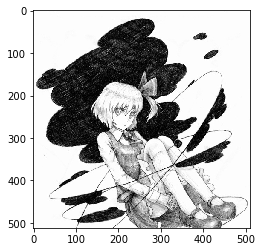

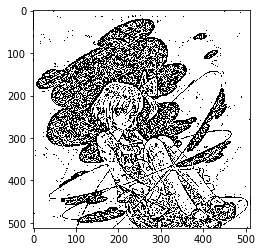

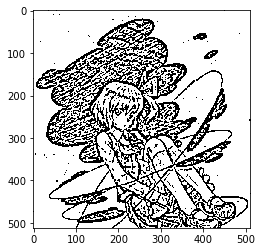

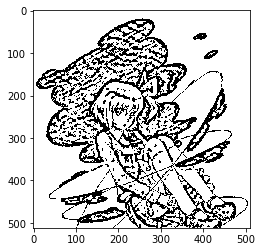

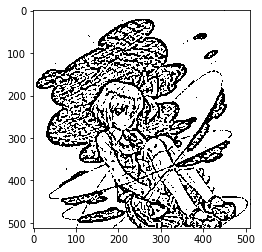

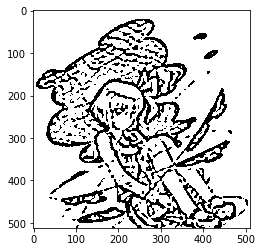

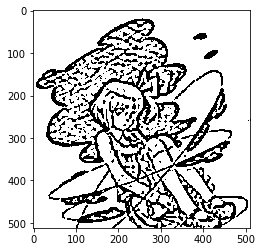

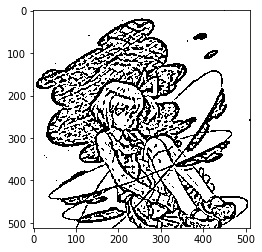

In [15]:
img = load_img(img_path)
img_arr = img_to_array(img)
plot_img_array(img_arr)
edge = extract_edge(img_path)
plot_img_array(edge)
edge = extract_edge(img_path, blur=True)
plot_img_array(edge)
edge = extract_edge(img_path, bilateral=True)
plot_img_array(edge)
edge = extract_edge(img_path, median=True)
plot_img_array(edge)
edge = extract_edge(img_path, bilateral=True, median=True)
plot_img_array(edge)
edge = extract_edge(img_path, bilateral=True, blur=True)
plot_img_array(edge)
edge = extract_edge(img_path, median=True, blur=True)  #best combo so far
plot_img_array(edge)

In [43]:
def plot_edge(imname, blur=False, median=False, bilateral=False):
    cimg = cv2.imread(imname,1)
    cimg = np.fliplr(cimg.reshape(-1,3)).reshape(cimg.shape)
    cimg = cv2.resize(cimg, (256,256))

    img = cv2.imread(imname,0)
    
    seg = np.ones_like(cimg)

    num_segs = 8
    seg_len = 256//num_segs

    for x in range(num_segs):
        for y in range(num_segs):
            seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 0] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 0])
            seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 1] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 1])
            seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 2] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 2])

    if blur:
        img = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
    if median:
        img = cv2.medianBlur(img,5)
    if bilateral:
        img = cv2.bilateralFilter(img,9,75,75)

    
    img_edge = cv2.adaptiveThreshold(img, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY,
                                     blockSize=9,
                                     C=2)
    
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    

    plt.subplot(131),plt.imshow(cimg)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132),plt.imshow(seg)
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(133),plt.imshow(img_edge,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    return img_edge

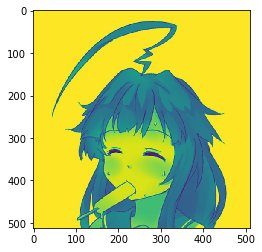

In [44]:
img = cv2.imread(IMAGES_PATH+"4.jpg")
img = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )
plot_img_array(img)

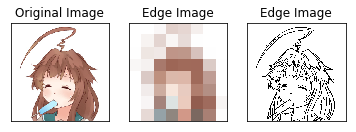

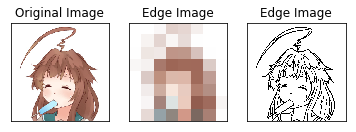

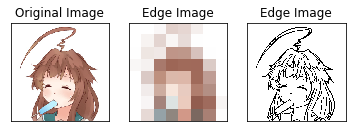

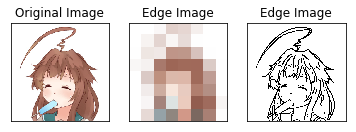

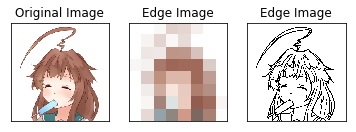

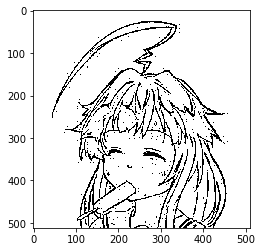

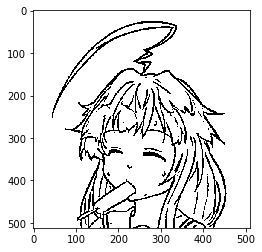

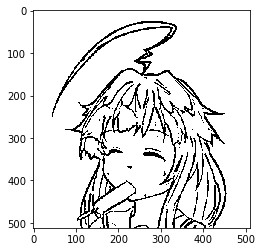

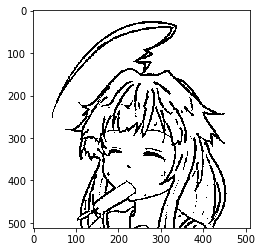

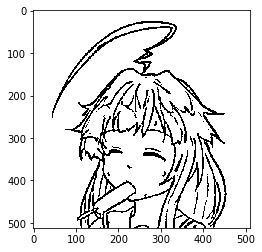

True

In [45]:
noblur_edge = plot_edge(IMAGES_PATH+"4.jpg")
blur_edge = plot_edge(IMAGES_PATH+"4.jpg",blur=True)
median_edge = plot_edge(IMAGES_PATH+"4.jpg",median=True)
bilateral_edge = plot_edge(IMAGES_PATH+"4.jpg",bilateral=True)
all_edge = plot_edge(IMAGES_PATH+"4.jpg",median=True, blur=True)

plot_img_array(noblur_edge)
plot_img_array(blur_edge)
plot_img_array(median_edge)
plot_img_array(bilateral_edge)
plot_img_array(all_edge)
cv2.imwrite(EDGES_PATH+"nobluredge.png",noblur_edge)
cv2.imwrite(EDGES_PATH+"bluredge.png",blur_edge)
cv2.imwrite(EDGES_PATH+"medianedge.png",median_edge)
cv2.imwrite(EDGES_PATH+"bilateraledge.png",bilateral_edge)
cv2.imwrite(EDGES_PATH+"alledge.png",all_edge)

In [19]:
all_edge.shape

(512, 511, 3)

/home/bfortuner/workplace/deepcolor/imgs/8119.jpg


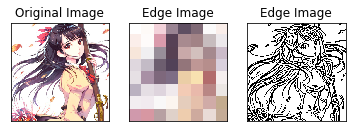

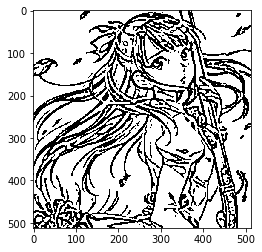

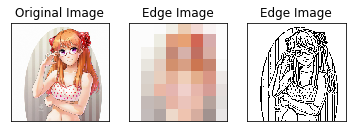

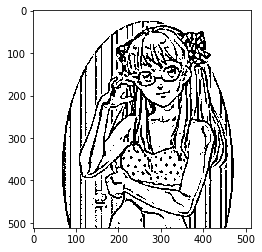

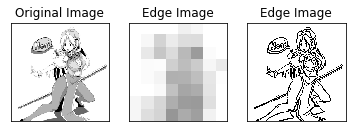

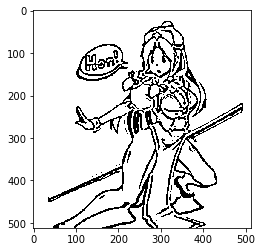

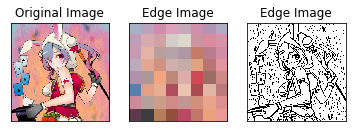

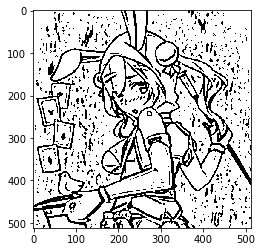

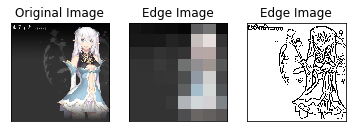

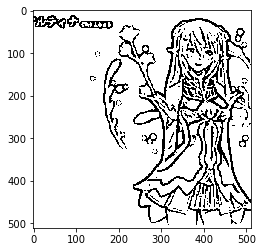

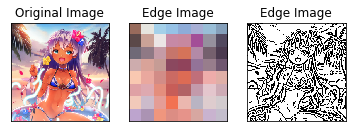

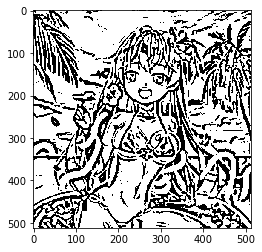

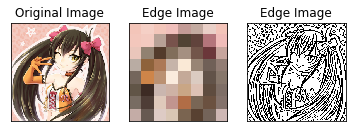

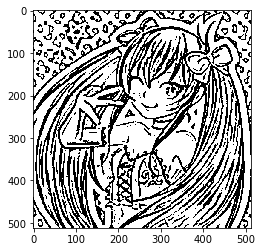

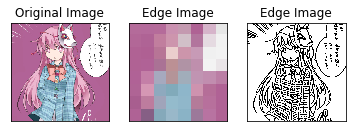

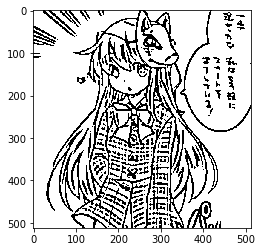

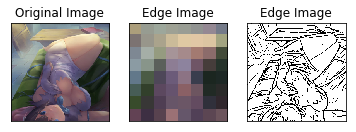

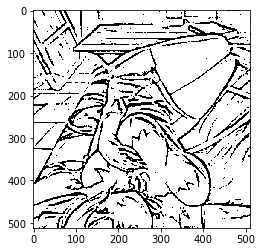

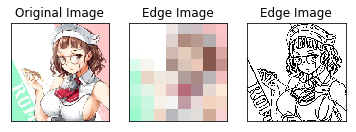

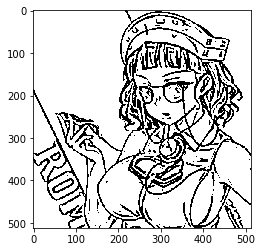

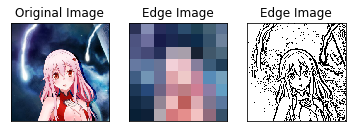

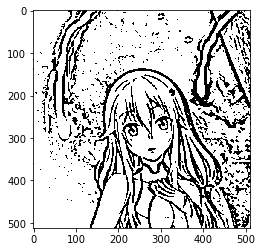

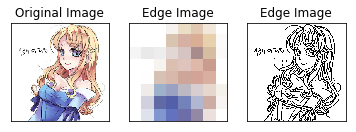

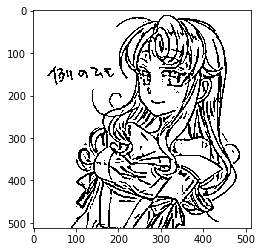

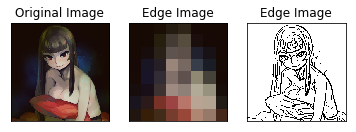

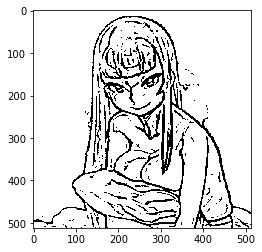

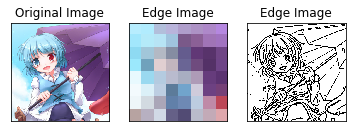

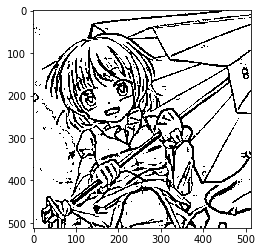

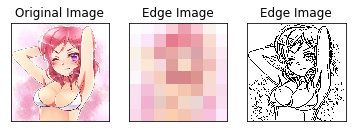

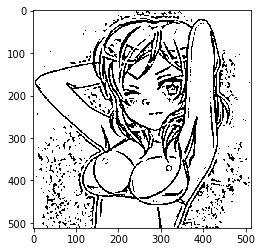

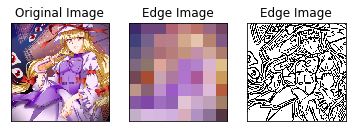

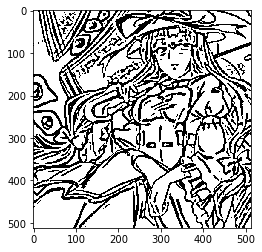

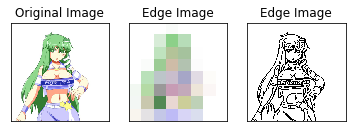

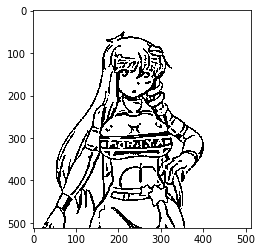

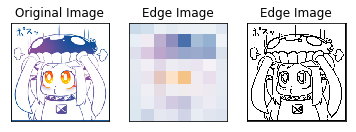

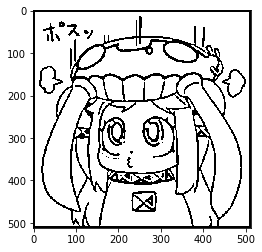

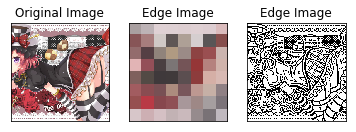

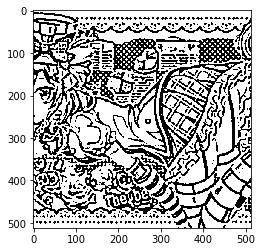

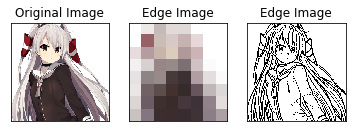

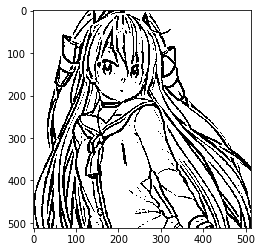

In [18]:
data = glob(IMAGES_PATH+"*.jpg")
print (data[0])
for imname in data[:20]:
    plot_img_array(plot_edge(imname, median=True, blur=True))

## Sobel Edge Detection

In [115]:
img_path = get_random_image_path(IMAGES_PATH)
print(img_path)

/home/bfortuner/workplace/deepcolor/imgs/1636.jpg


In [109]:
img = cv2.imread(img_path)
blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise

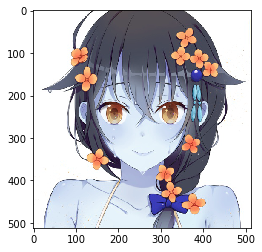

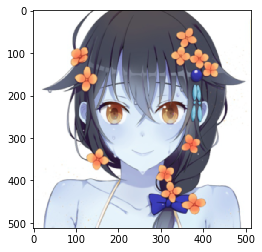

In [116]:
plot_img_array(img)
plot_img_array(blurred)

In [117]:
def edgedetect(channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)

    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

In [124]:
edgeImg = np.max( np.array([ edgedetect(blurred[:,:, 0]), edgedetect(blurred[:,:, 1]), edgedetect(blurred[:,:, 2]) ]), axis=0 )

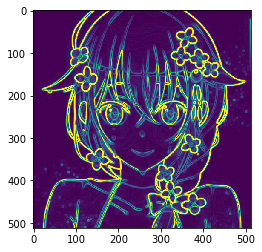

In [125]:
plot_img_array(edgeImg)

In [126]:
mean = np.mean(edgeImg);
# Zero any value that is less than mean. This reduces a lot of noise.
edgeImg[edgeImg <= mean] = 0;

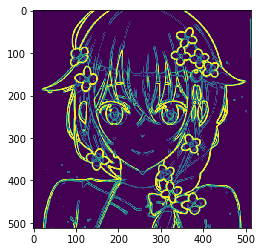

In [127]:
plot_img_array(edgeImg)

In [128]:
def findSignificantContours (img, edgeImg):
    image, contours, heirarchy = cv2.findContours(edgeImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find level 1 contours
    level1 = []
    for i, tupl in enumerate(heirarchy[0]):
        # Each array is in format (Next, Prev, First child, Parent)
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl, 0, [i])
            level1.append(tupl)



    # From among them, find the contours with large surface area.
    significant = []
    tooSmall = edgeImg.size * 5 / 100 # If contour isn't covering 5% of total area of image then it probably is too small
    for tupl in level1:
        contour = contours[tupl[0]];
        area = cv2.contourArea(contour)
        if area > tooSmall:
            significant.append([contour, area])

            # Draw the contour on the original image
            cv2.drawContours(img, [contour], 0, (0,255,0),2, cv2.LINE_AA, maxLevel=1)

    significant.sort(key=lambda x: x[1])
    #print ([x[1] for x in significant]);
    return [x[0] for x in significant];

In [129]:
edgeImg_8u = np.asarray(edgeImg, np.uint8)

# Find contours
significant = findSignificantContours(img, edgeImg_8u)

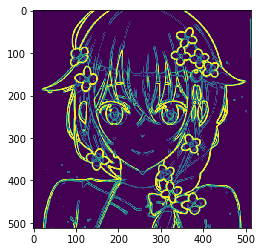

In [131]:
plot_img_array(edgeImg_8u)

In [132]:
# Mask
mask = edgeImg.copy()
mask[mask > 0] = 0
cv2.fillPoly(mask, significant, 255)
# Invert mask
mask = np.logical_not(mask)

#Finally remove the background
img[mask] = 0;

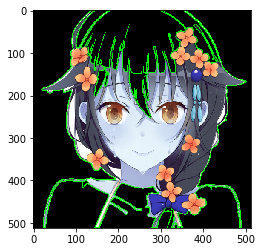

In [133]:
plot_img_array(img)